In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

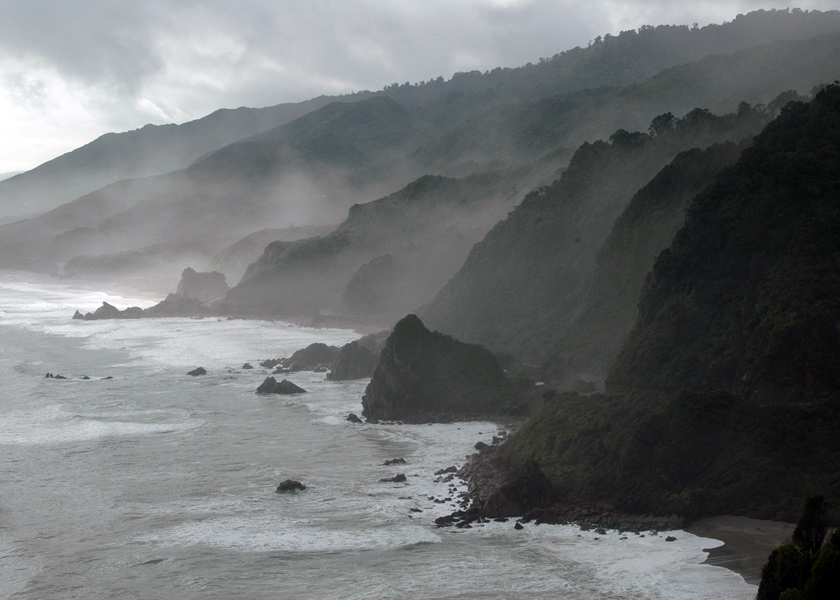

In [3]:
img_bgr = cv2.imread('Assets/Images/New_Zealand_Coast.jpg',1)
img_rgb = img_bgr[:,:,::-1]
Image(filename='Assets/Images/New_Zealand_Coast.jpg')

### applying brightness

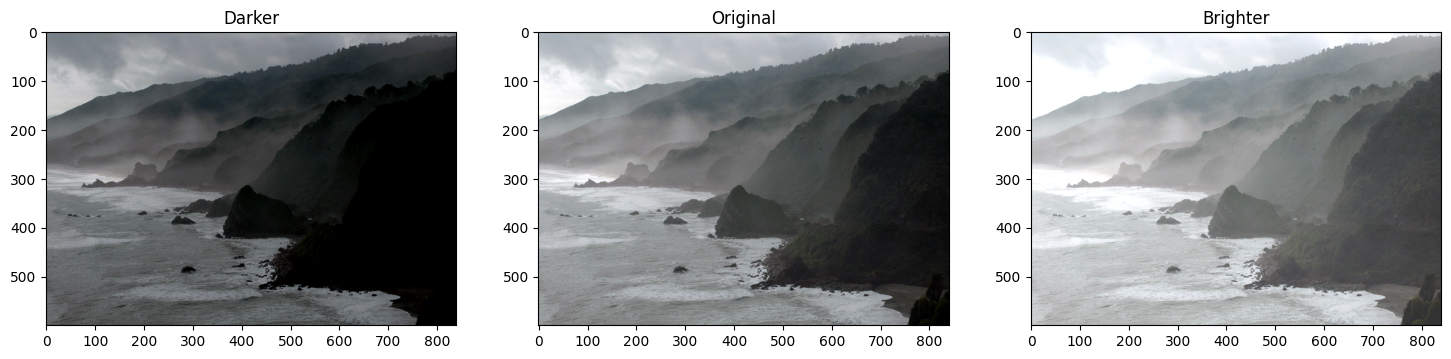

In [4]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

#show images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");


### Multiplication or contrast

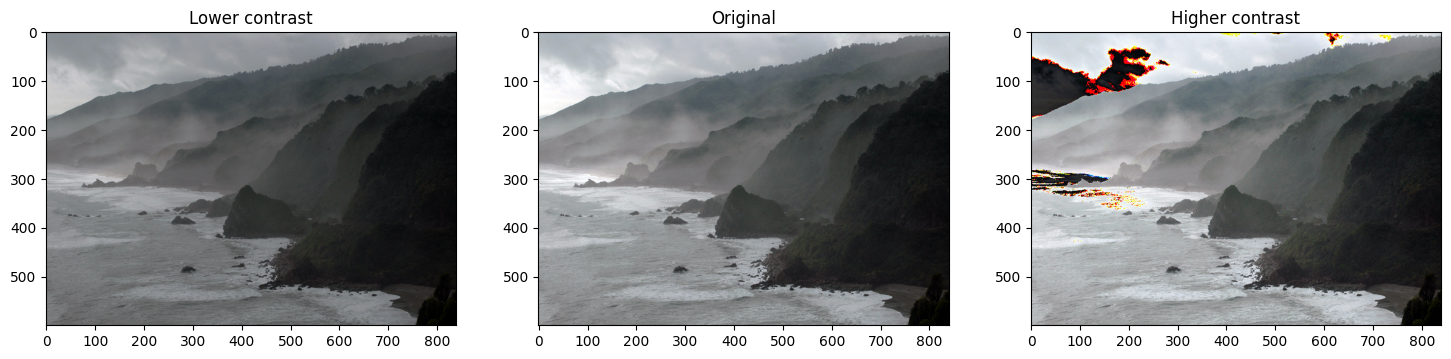

In [5]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb),matrix2))

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower contrast");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher contrast");


### handling overflow using np.clip

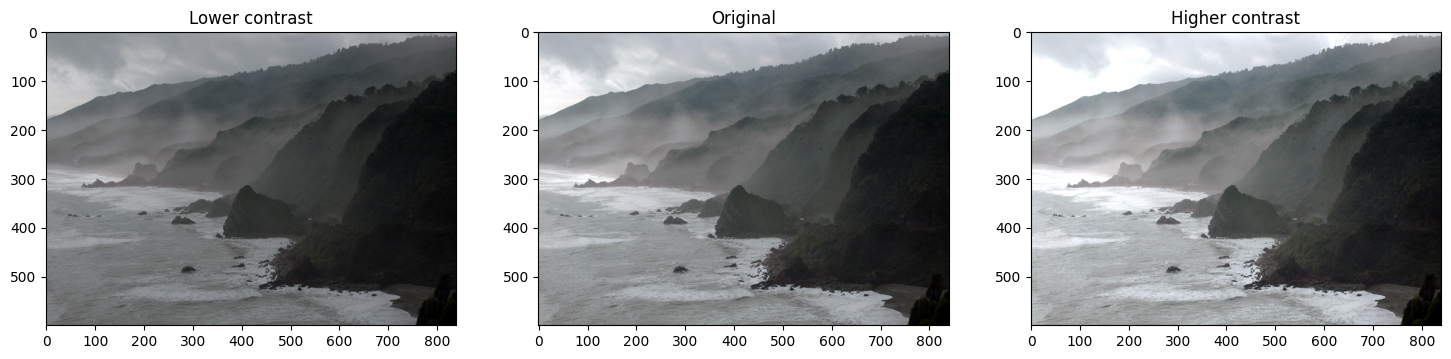

In [6]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb),matrix2),0,255))

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower contrast");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher contrast");


### use high brighness and lowe contrast

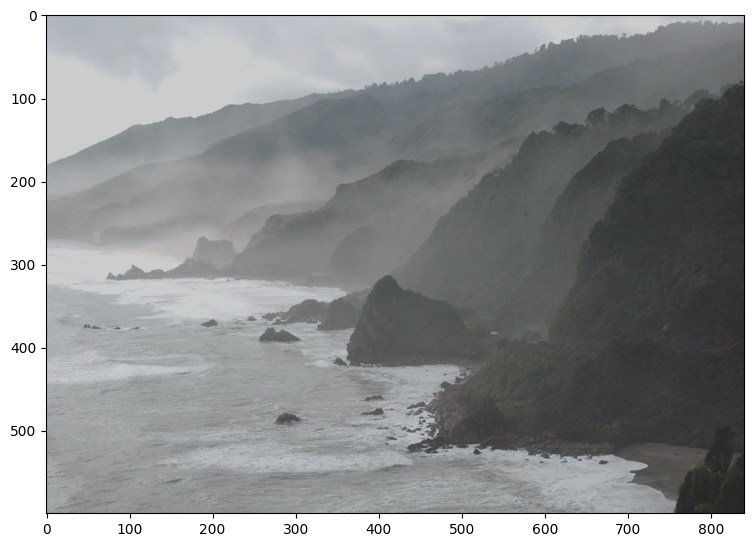

In [7]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
matrix1 = np.ones(img_rgb_brighter.shape) * .8
img_rgb_brighter_darker = np.uint8(cv2.multiply(np.float64(img_rgb_brighter), matrix1))
plt.imshow(img_rgb_brighter_darker)

### Image Thresholding

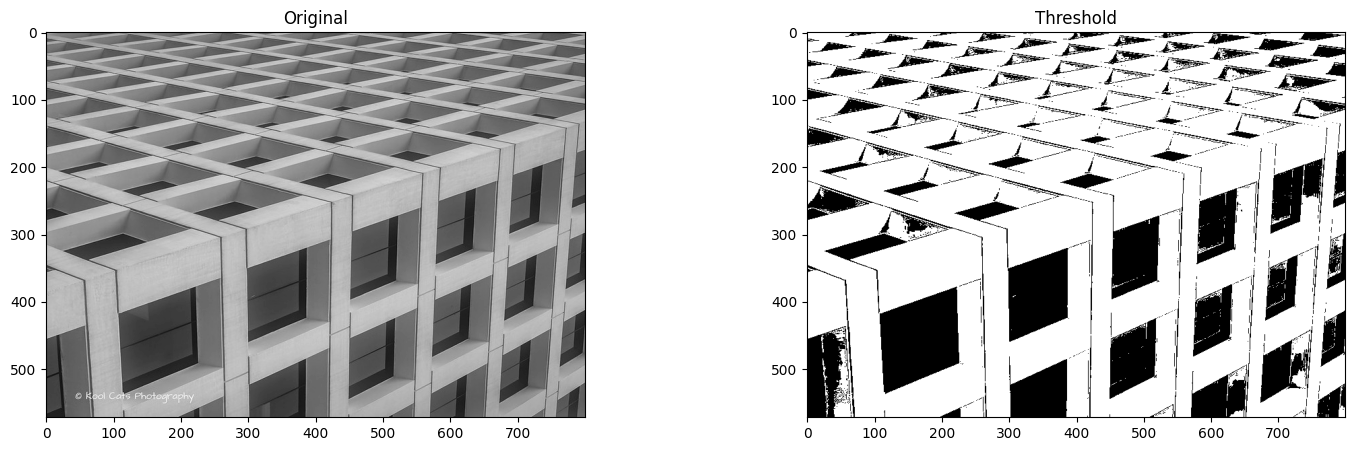

In [8]:
img_read = cv2.imread('Assets/Images/building-windows.jpg',0)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_read,cmap='gray'); plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh,cmap='gray'); plt.title("Threshold");

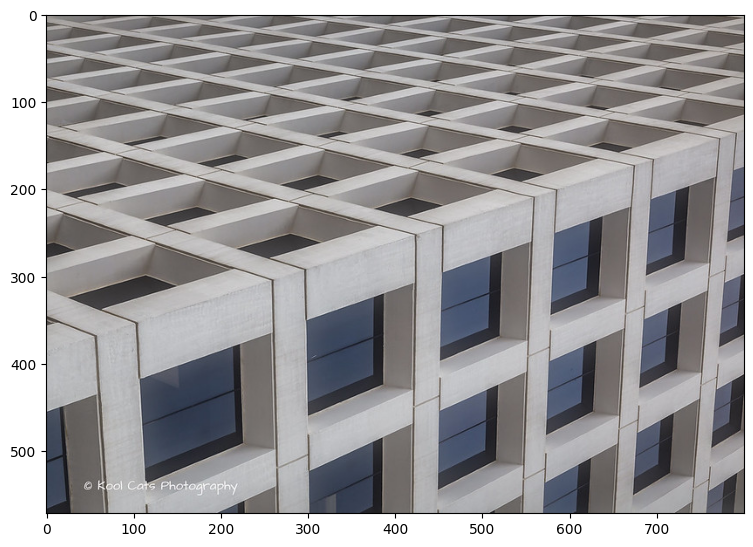

In [9]:
img_read_bgr = cv2.imread('Assets/Images/building-windows.jpg',1)
img_read_rgb = img_read_bgr[:,:,::-1]
plt.imshow(img_read_rgb)

### application of sheet music reader

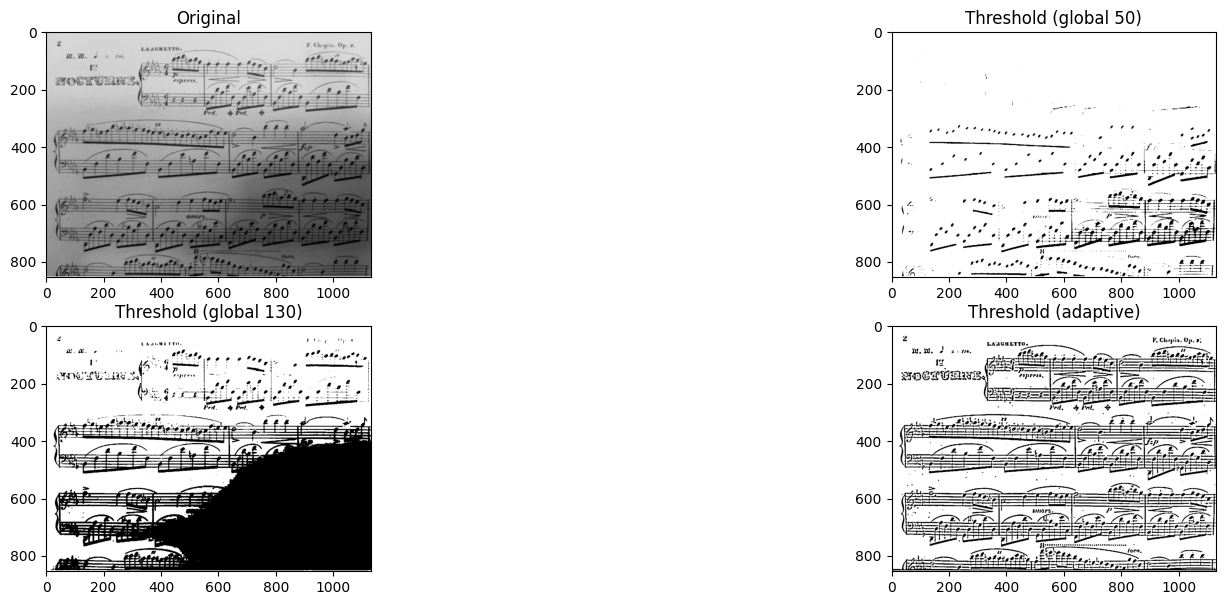

In [10]:
img_read = cv2.imread("Assets/Images/Piano_Sheet_Music.png", 0)
retval, img_thresh_gb1_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gb1_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)
plt.figure(figsize=[20,7])
plt.subplot(221);plt.imshow(img_read,cmap='gray');plt.title("Original");
plt.subplot(222);plt.imshow(img_thresh_gb1_1,cmap='gray');plt.title("Threshold (global 50)");
plt.subplot(223);plt.imshow(img_thresh_gb1_2,cmap='gray');plt.title("Threshold (global 130)");
plt.subplot(224);plt.imshow(img_thresh_adp,cmap='gray');plt.title("Threshold (adaptive)");

(200, 499)
(200, 499)


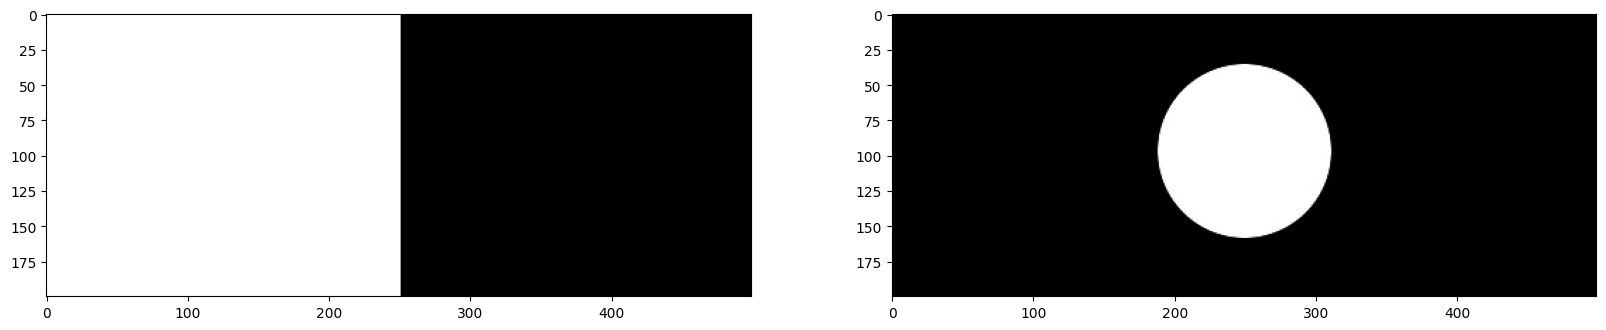

In [14]:
img_rec = cv2.imread("Assets/Images/rectangle.jpg", 0)
img_cir = cv2.imread("Assets/Images/circle.jpg", 0)
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec,cmap='gray');
plt.subplot(122);plt.imshow(img_cir, cmap='gray');
print(img_rec.shape)
print(img_cir.shape)

### Bitwise AND Operator

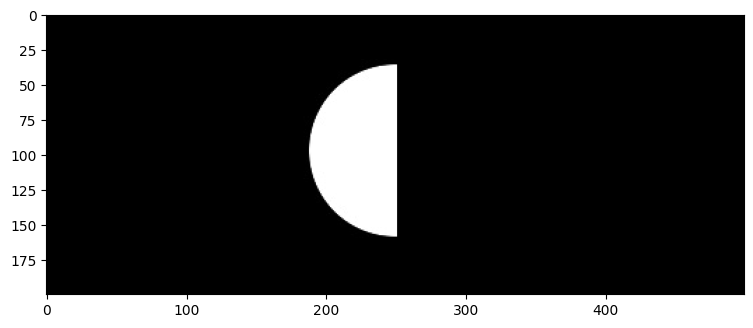

In [17]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray') # returns 255 if both pixels are white

### Bitwise OR Operator

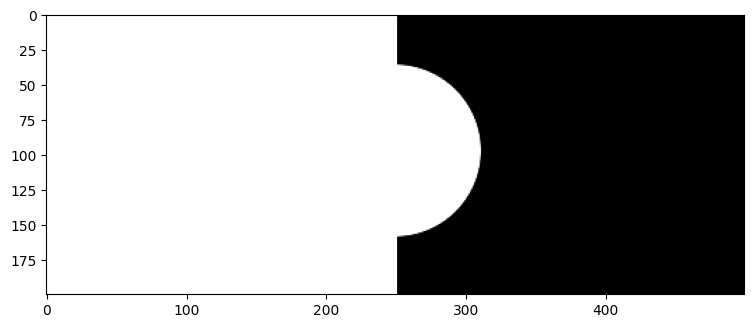

In [19]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray') # returns 255 if any one pixels are white

### Bitwise XOR Operator

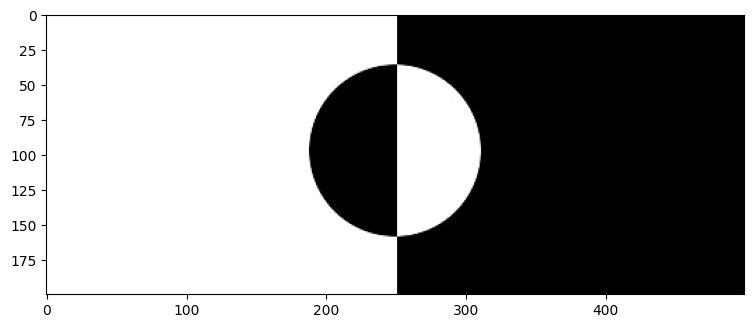

In [22]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray') # it returns white if either one is white but not both

### Application logo manipulation

(700, 700, 3)


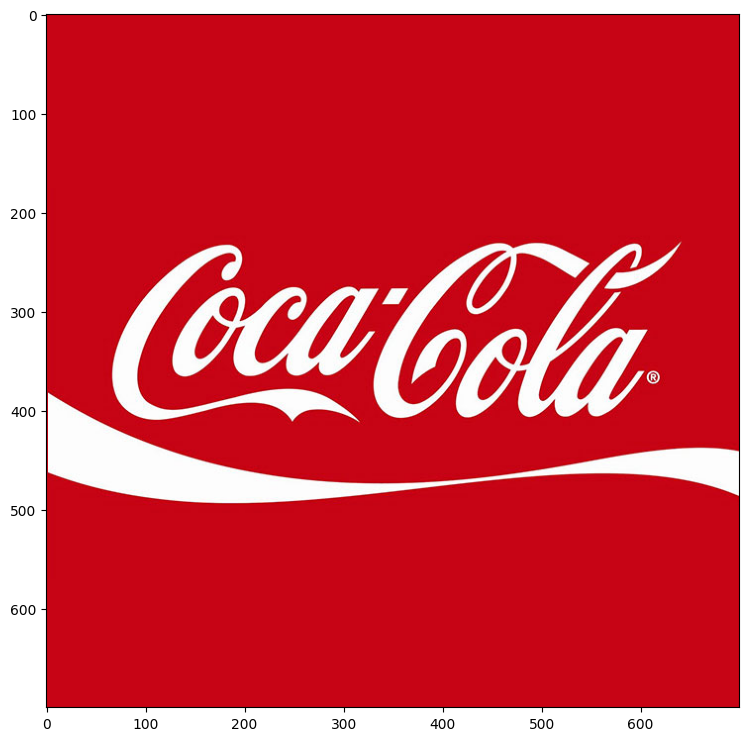

In [24]:
img_bgr = cv2.imread("Assets/Images/coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


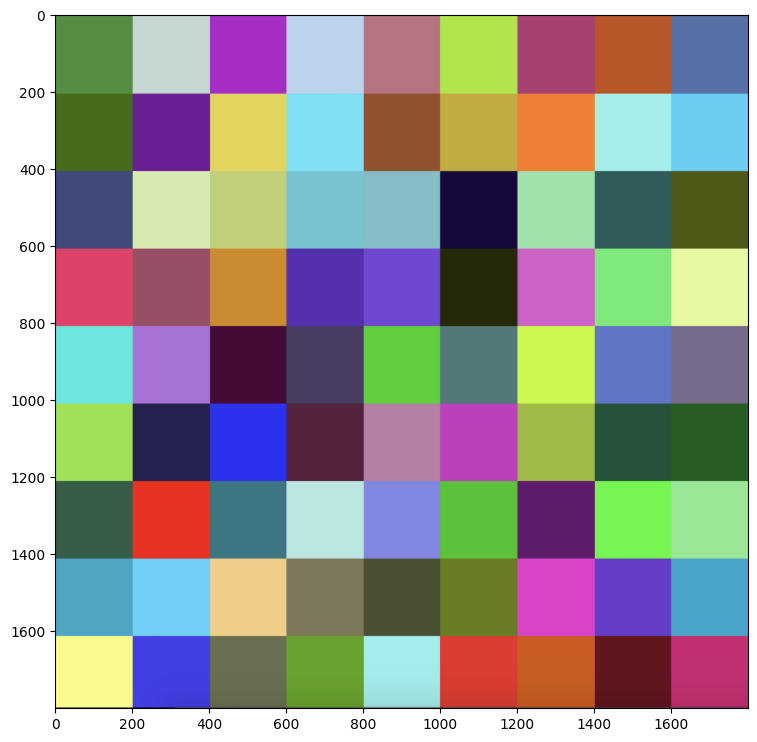

In [30]:
# read the image of color checkerboard background
img_background_bgr = cv2.imread("Assets/Images/checkerboard_color.png",1)
img_background_rgb = img_background_bgr[:,:,::-1]
plt.imshow(img_background_rgb)

# set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)
print(img_background_rgb.shape)

### create mask for original image

(700, 700)


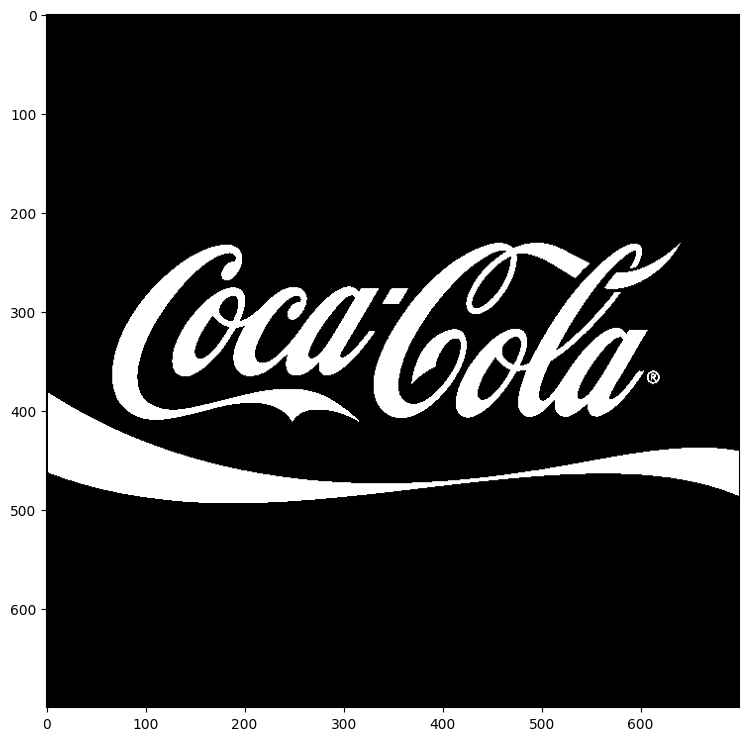

In [40]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

In [37]:
cv2.__version__

'4.10.0'

### invert the mask

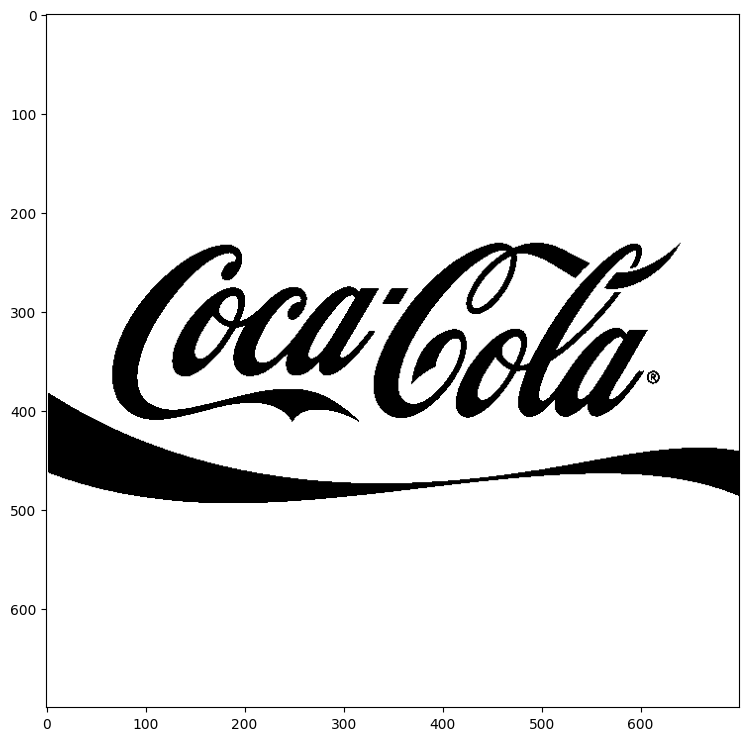

In [41]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

### apply background on the mask

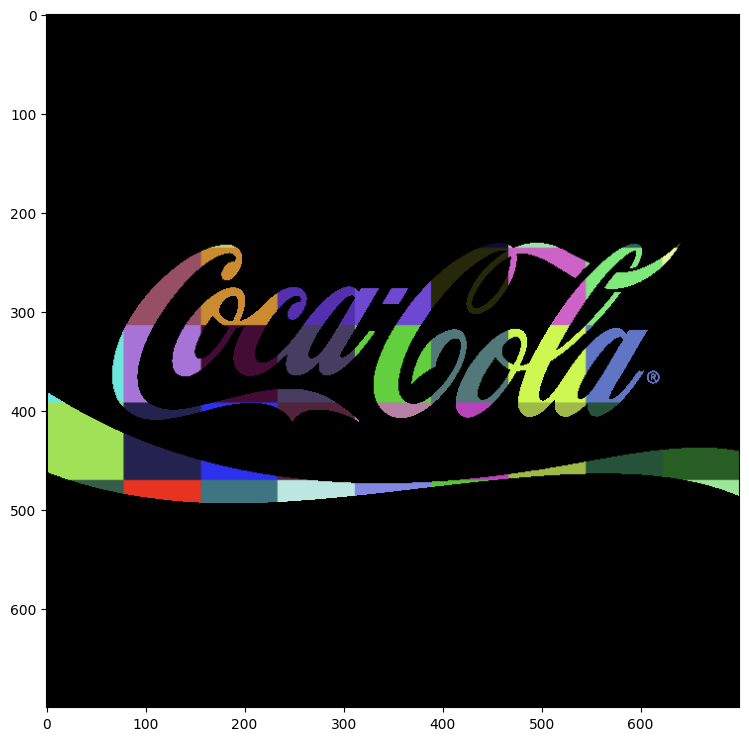

In [42]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb,mask=img_mask)
plt.imshow(img_background)

### isolate foreground from image

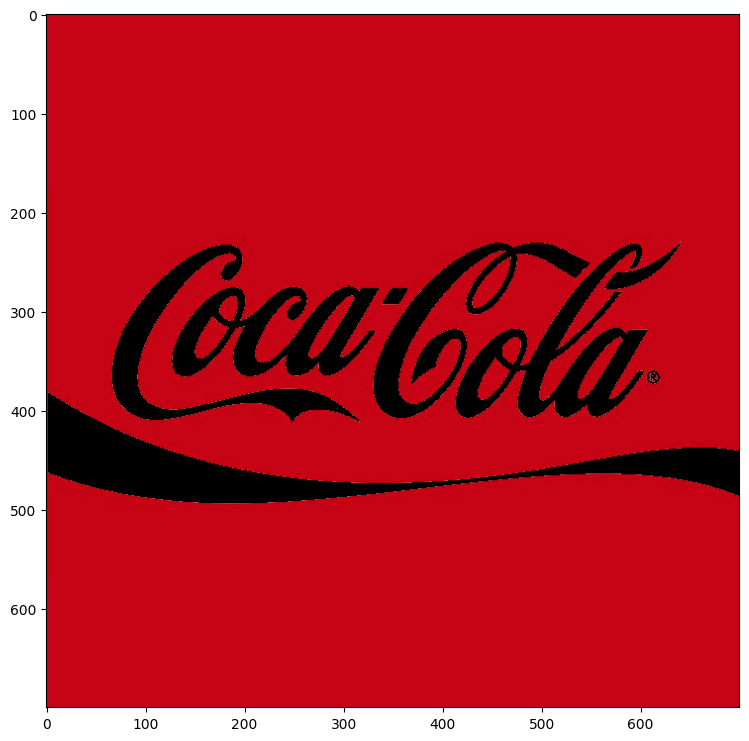

In [43]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask = img_mask_inv)
plt.imshow(img_foreground)

### Result merge foreground and background

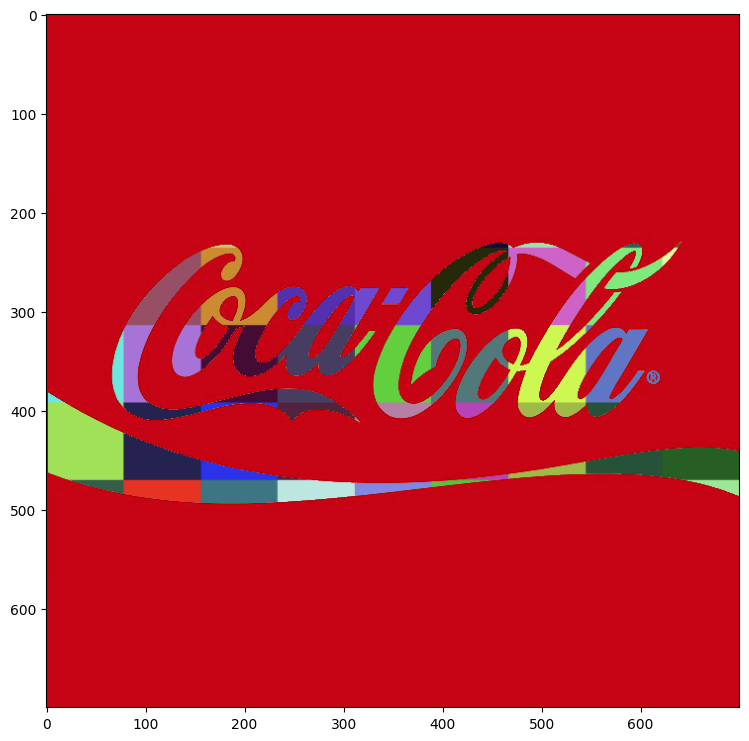

In [44]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)